## **Task 1: Student Score Prediction**

• Build a model to predict students' exam scores based on their study hour

• Perform data cleaning and basic visualization to understand the datase

• Split the dataset into training and testing set

• Train a linear regression model to estimate final score

• Visualize predictions and evaluate model performance 

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
%matplotlib inline

df = pd.read_csv("StudentPerformanceFactors.csv");
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## **Data Preparation** 

In [21]:
# Drop rows where Exam_Score or Study_Hours are missing
df = df.dropna(subset=["Exam_Score", "Hours_Studied"])

In [22]:
# Fill missing numeric values (if any) with median
df = df.fillna(df.median(numeric_only=True))

# Remove duplicates
df = df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

Text(0.5, 1.0, 'Exam Score based on Study Hours')

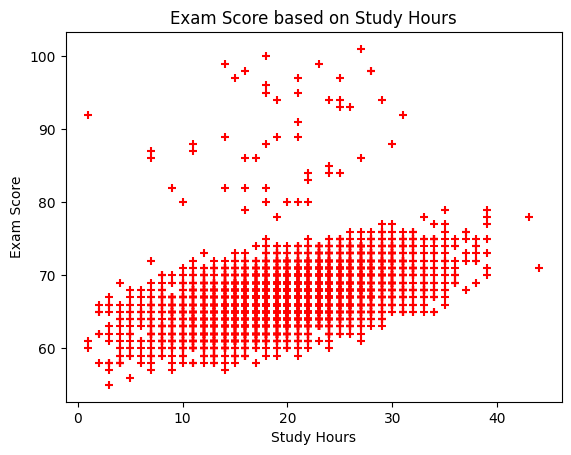

In [23]:
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.scatter(df.Hours_Studied, df.Exam_Score, color='red', marker='+')
plt.title("Exam Score based on Study Hours")

In [24]:
# Split the dataset into training and testing 
X = df[['Hours_Studied']]
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# train the model on the dataset 
reg = LinearRegression()
reg.fit(X_train, y_train) 

LinearRegression()

In [34]:
# Custom predictions 
reg.predict([[19]])

C:\Users\PMLS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([66.93887361])

In [35]:
reg.coef_

array([0.28566874])

In [36]:
reg.intercept_

np.float64(61.511167469044246)

In [37]:
# Predictions 
y_pred = reg.predict(X_test)
y_pred

array([67.22454236, 67.79587985, 67.5102111 , ..., 68.08154859,
       67.5102111 , 68.08154859], shape=(1322,))

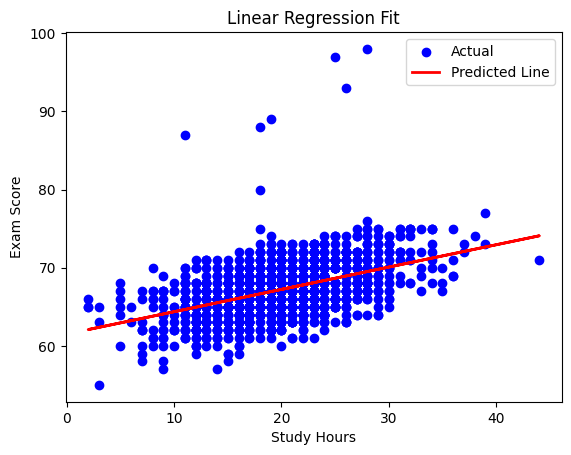

In [38]:
# plot a scatter plot 
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, reg.predict(X_test), color='red', linewidth=2, label='Predicted Line')
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

# **Bonus:**
## Try polynomial regression and compare performance

In [39]:
# 1) Polynomial transformation (make new features: Hours and Hours^2)
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [40]:
# 2) Train linear regression on these new features
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

In [42]:
# 3) Predictions
y_pred_poly = poly_reg.predict(X_test_poly)
y_pred_poly

array([67.17752589, 67.75427873, 67.46459307, ..., 68.04658285,
       67.46459307, 68.04658285], shape=(1322,))

In [47]:
# 4) Compare with normal linear regression
print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 :", r2_score(y_test, y_pred))

print("\nPolynomial Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_poly))
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("R2 :", r2_score(y_test, y_pred_poly))

Linear Regression Performance:
MAE: 2.4475687452945643
MSE: 10.85592128879332
R2 : 0.2319868674542106

Polynomial Regression Performance:
MAE: 2.4447795821288105
MSE: 10.84498813570501
R2 : 0.23276034442853466


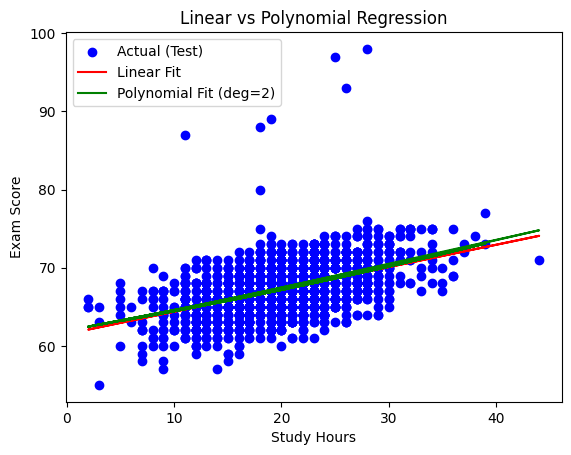

In [52]:
# 5)Visualization 
plt.scatter(X_test, y_test, color='blue', label="Actual (Test)")

# Linear regression line 
plt.plot(X_test, reg.predict(X_test), color='red', label="Linear Fit")

# Polynomial regression line
plt.plot(X_test, poly_reg.predict(X_test_poly), color='green', label="Polynomial Fit (deg=2)")

plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.show()

### Try experimenting with different feature combinations (e.g., removing or adding features like sleep, participation, etc.)

In [61]:
# 1)Use multiple features 
features = df[["Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores"]]
X_multi = features
y_multi = df['Exam_Score']

# 2)train test split 
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

In [62]:
# 3)train the model 
multi_reg = LinearRegression()
multi_reg.fit(X_multi_train, y_multi_train)

LinearRegression()

In [67]:
# 4)Predictions 
y_pred_multi= multi_reg.predict(X_multi_test)
y_pred_multi

array([66.02523469, 67.12180843, 68.71890934, ..., 65.89219351,
       65.59165207, 70.57225451], shape=(1322,))

In [69]:
# 5)Performance metrices 
print("Multiple Features Regression Performance:")
print("MAE:", mean_absolute_error(y_multi_test, y_pred_multi))
print("MSE:", mean_squared_error(y_multi_test, y_pred_multi))
print("R2 :", r2_score(y_multi_test, y_pred_multi))

Multiple Features Regression Performance:
MAE: 1.360888922481052
MSE: 5.345751105427533
R2 : 0.6218094307179828


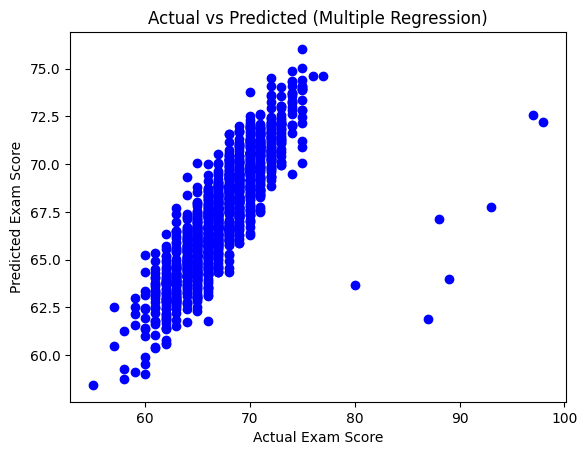

In [70]:
# 6)Visualization 
plt.scatter(y_multi_test, y_pred_multi, color="blue")
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted (Multiple Regression)")
plt.show()

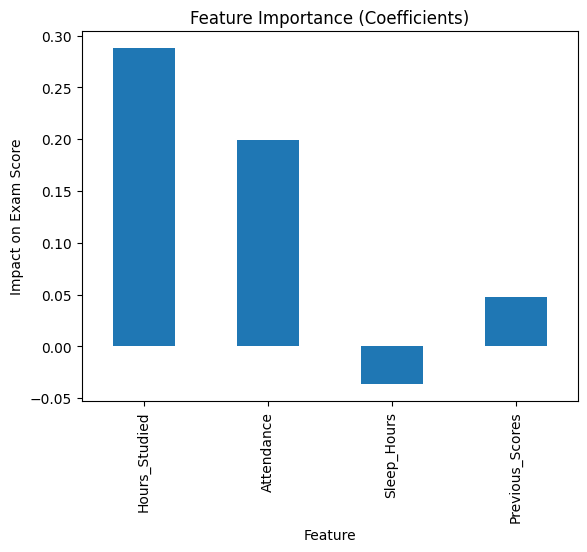

In [71]:
# Importance of each feature on exam score 
coef_df = pd.DataFrame({
    "Feature": X_multi.columns,
    "Coefficient": multi_reg.coef_
})

coef_df.plot(kind="bar", x="Feature", legend=False)
plt.title("Feature Importance (Coefficients)")
plt.ylabel("Impact on Exam Score")
plt.show()
